# [Project Content](#0)
* 1. [Introduction](#1)
    * 1.1 [Dataset Overview](#1.1)
    * 1.2 [Data Science Application](#1.2)
    * 1.3 [Source](#1.3)
* 2. [First Organization](#2)
    * 2.1 [Loading Basic Libraries](#2.1)
    * 2.2 [Loading Dataset](#2.2)
        * 2.2.1 [Getting to Know The Variables](#2.2.1)
    * 2.3 [First Evaluation Of Dataframe](#2.3)
        * 2.3.1 [Analysis Output](#2.3.1)
    * 2.4 [Analysis of Unique Values](#2.4)
* 3. [Data Cleaning](#3)
    * 3.1 [Type Variable](#3.1)
    * 3.2 [Year Variable](#3.2)
    * 3.3 [LastSoldOn Variable](#3.3)
    * 3.4 [Drop text Variable](#3.4)
* 4. [Data Analysis](#4)
    * 4.1 [Outliers](#4.1)
    * 4.2 [Distribution](#4.2)

# 1. Introduction <a id=1></a>

## 1.1 Dataset Overview <a id=1.1></a>

This dataset contains real estate listings from Utah, comprising 4,440 entries and 14 columns. The data includes various attributes of properties such as type, description, year built, number of bedrooms and bathrooms, garage spaces, lot size, square footage, stories, listing price, and the date the property was last sold. The data was ethically mined from Realtor.com using an API provided by Apify.

## 1.2 Data Science Applications <a id=1.2></a>

Given the size of the dataset (4,440 entries) and the available columns, this dataset is well-suited for various data science applications, including but not limited to:

**Regression Analysis**: Predict property listing prices based on features like square footage, number of bedrooms and bathrooms, year built, and lot size.

**Classification**: Classify properties into different types or price ranges.

**Time Series Analysis**: Analyze trends in property sales over time using the lastSoldOn column.

**Feature Engineering**: Create new features such as price per square foot or age of the property at the time of sale to enhance predictive models.

## 1.3 Source <a id=1.3></a>

The source of above content and dataset is from kaggle. You can get access to the dataset from this [Link](https://www.kaggle.com/datasets/kanchana1990/real-estate-data-utah-2024)

# 2. First Organization <a id=2></a>

## 2.1 Loading Basic Libraries <a id=2.1></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.2 Loading Dataset <a id=2.2></a>

In [2]:
df = pd.read_csv("real_estate_utah.csv")

### 2.2.1 Getting to Know The Variables <a id=2.2.1></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        4440 non-null   object 
 1   text        4440 non-null   object 
 2   year_built  4440 non-null   float64
 3   beds        4440 non-null   float64
 4   baths       4440 non-null   float64
 5   baths_full  4440 non-null   float64
 6   baths_half  4440 non-null   float64
 7   garage      4440 non-null   float64
 8   lot_sqft    4440 non-null   float64
 9   sqft        4440 non-null   float64
 10  stories     4440 non-null   float64
 11  lastSoldOn  4440 non-null   object 
 12  listPrice   4440 non-null   float64
 13  status      4440 non-null   object 
dtypes: float64(10), object(4)
memory usage: 485.8+ KB


| Column Name | Description                                            |
|-------------|--------------------------------------------------------|
| type        | Type of property (e.g., single_family, land)           |
| text        | Description of the property                            |
| year_built  | Year the property was built                            |
| beds        | Number of bedrooms                                     |
| baths       | Total number of bathrooms                              |
| baths_full  | Number of full bathrooms                               |
| baths_half  | Number of half bathrooms                               |
| garage      | Number of garage spaces                                |
| lot_sqft    | Lot size in square feet                                |
| sqft        | Property size in square feet                           |
| stories     | Number of stories                                      |
| lastSoldOn  | Date the property was last sold                        |
| listPrice   | Listing price of the property                          |
| status      | Current status of the property (e.g., for_sale)        |


# 2.3 First Evaluation Of DataFrame <a id=2.3></a>

In [4]:
df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldOn,listPrice,status
0,single_family,"Escape to tranquility with this off-grid, unfi...",2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,2018-05-31,90000.0,for_sale
1,single_family,Beautiful home in the desirable Oak Hills and ...,1968.0,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,2.0,2018-05-31,799000.0,for_sale
2,single_family,"Welcome to your new home, nestled in the heart...",1985.0,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,2.0,2018-05-31,389900.0,for_sale
3,single_family,Investment Opportunity. House needs some work ...,1936.0,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,2.0,2018-04-16,300000.0,for_sale
4,land,Deer Springs Ranch is an 8000 Ac Ranch in an H...,2003.0,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,2.0,2018-05-31,70000.0,for_sale


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        4440 non-null   object 
 1   text        4440 non-null   object 
 2   year_built  4440 non-null   float64
 3   beds        4440 non-null   float64
 4   baths       4440 non-null   float64
 5   baths_full  4440 non-null   float64
 6   baths_half  4440 non-null   float64
 7   garage      4440 non-null   float64
 8   lot_sqft    4440 non-null   float64
 9   sqft        4440 non-null   float64
 10  stories     4440 non-null   float64
 11  lastSoldOn  4440 non-null   object 
 12  listPrice   4440 non-null   float64
 13  status      4440 non-null   object 
dtypes: float64(10), object(4)
memory usage: 485.8+ KB


In [6]:
df.isna().sum()

type          0
text          0
year_built    0
beds          0
baths         0
baths_full    0
baths_half    0
garage        0
lot_sqft      0
sqft          0
stories       0
lastSoldOn    0
listPrice     0
status        0
dtype: int64

In [7]:
df.shape

(4440, 14)

### 2.3.1 Analysis Output <a id=2.3.1></a>

**Analysis Output**:
* This dataset contains 4440 records within all variables, so there are no missing values
* There are 14 feature
* 10 features are with float datatype and 4 features are objects

## 2.4 Analysis Of Unique Values <a id=2.4></a>

In [10]:
pd.DataFrame(df.nunique(), columns=['Unique Values Count'])

,Unique Values Count
type,11
text,3991
year_built,140
beds,12
baths,16
baths_full,14
baths_half,5
garage,16
lot_sqft,554
sqft,2176


In [16]:
pd.DataFrame(df.type.value_counts())

,count
type,
single_family,2883
land,801
townhomes,344
mobile,206
condos,156
townhouse,14
other,12
farm,9
condo_townhome_rowhome_coop,8


In [18]:
pd.DataFrame(df.lastSoldOn.value_counts())

,count
lastSoldOn,
2018-05-31,2969
2022-07-01,5
2020-07-10,4
2020-06-26,4
2019-07-01,4
...,...
2018-08-30,1
2013-09-10,1
2012-08-14,1


In [19]:
pd.DataFrame(df.status.value_counts())

,count
status,
for_sale,4185
ready_to_build,255


In [23]:
pd.DataFrame(df.stories.value_counts())

,count
stories,
2.0,2794
1.0,842
3.0,767
4.0,37


In [24]:
pd.DataFrame(df.baths_half.value_counts())

,count
baths_half,
1.0,4352
2.0,69
3.0,17
6.0,1
4.0,1


# 3. Data Preprocessing <a id=3></a>

## 3.1 Type Variable
_Merge similar categories such as 'condos', 'condo_townhome_rowhome_coop', 'condo_townhome', and 'condo' into a single category._

In [20]:
type_mapping = {
    'single_family': 'single_family',
    'land': 'land',
    'townhomes': 'townhome',
    'townhouse': 'townhome',
    'mobile': 'mobile',
    'condos': 'condo',
    'condo_townhome_rowhome_coop': 'condo',
    'condo_townhome': 'condo',
    'condo': 'condo',
    'other': 'other',
    'farm': 'farm'
}

In [21]:
df['type'] = df['type'].map(type_mapping)

In [22]:
pd.DataFrame(df.type.value_counts())

,count
type,
single_family,2883
land,801
townhome,358
mobile,206
condo,171
other,12
farm,9


## 3.2 Year Variable <a id=3.2></a>
_Correcting its datatype to integer_

In [28]:
df['year_built'] = df['year_built'].astype('int')

## 3.3 LastSoldOn Variable <a id=3.4></a>
_Changing datatype to datetime format_

In [31]:
df['lastSoldOn'] = pd.to_datetime(df['lastSoldOn'])

In [34]:
df.info() # To validate previous changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        4440 non-null   object        
 1   text        4440 non-null   object        
 2   year_built  4440 non-null   int32         
 3   beds        4440 non-null   float64       
 4   baths       4440 non-null   float64       
 5   baths_full  4440 non-null   float64       
 6   baths_half  4440 non-null   float64       
 7   garage      4440 non-null   float64       
 8   lot_sqft    4440 non-null   float64       
 9   sqft        4440 non-null   float64       
 10  stories     4440 non-null   float64       
 11  lastSoldOn  4440 non-null   datetime64[ns]
 12  listPrice   4440 non-null   float64       
 13  status      4440 non-null   object        
dtypes: datetime64[ns](1), float64(9), int32(1), object(3)
memory usage: 468.4+ KB


## 3.4 Drop text Variable <a id=3.3></a>

In [35]:
df.drop(columns=['text'], axis=1, inplace=True)

In [36]:
df.head()

,type,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldOn,listPrice,status
0,single_family,2020,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,2018-05-31,90000.0,for_sale
1,single_family,1968,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,2.0,2018-05-31,799000.0,for_sale
2,single_family,1985,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,2.0,2018-05-31,389900.0,for_sale
3,single_family,1936,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,2.0,2018-04-16,300000.0,for_sale
4,land,2003,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,2.0,2018-05-31,70000.0,for_sale


# 4. Data Analysis <a id=4>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        4440 non-null   object        
 1   year_built  4440 non-null   int32         
 2   beds        4440 non-null   float64       
 3   baths       4440 non-null   float64       
 4   baths_full  4440 non-null   float64       
 5   baths_half  4440 non-null   float64       
 6   garage      4440 non-null   float64       
 7   lot_sqft    4440 non-null   float64       
 8   sqft        4440 non-null   float64       
 9   stories     4440 non-null   float64       
 10  lastSoldOn  4440 non-null   datetime64[ns]
 11  listPrice   4440 non-null   float64       
 12  status      4440 non-null   object        
dtypes: datetime64[ns](1), float64(9), int32(1), object(2)
memory usage: 433.7+ KB


## 4.1 Outliers <a id-4.></a>

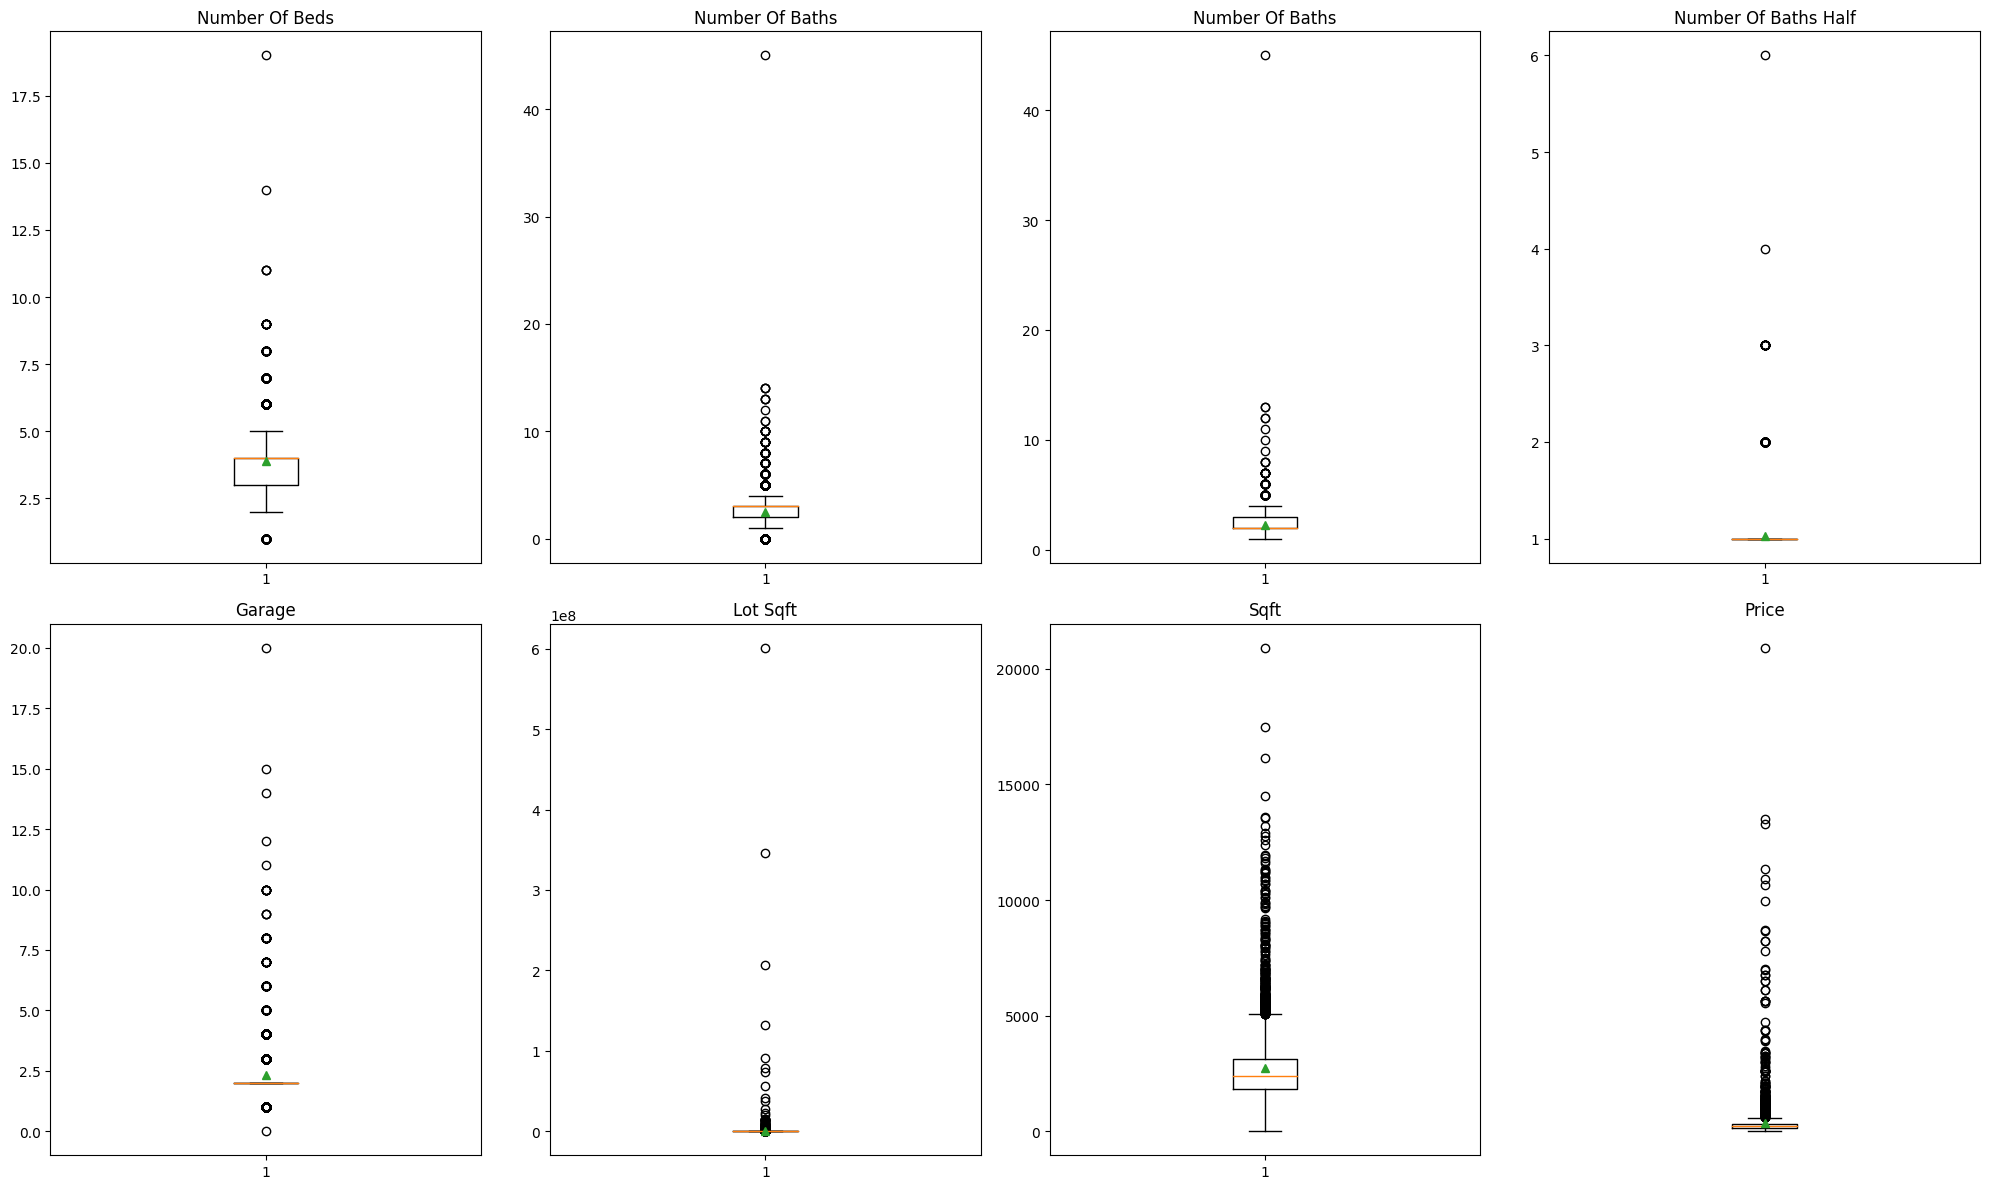

In [48]:
fig, ((ax1, ax2, ax3, ax4), (ax5 ,ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 12))

ax1.boxplot(df["beds"], showmeans=True)
ax1.set_title("Number Of Beds")

ax2.boxplot(df["baths"], showmeans=True)
ax2.set_title("Number Of Baths")

ax3.boxplot(df["baths_full"], showmeans=True)
ax3.set_title("Number Of Baths")

ax4.boxplot(df["baths_half"], showmeans=True)
ax4.set_title("Number Of Baths Half")

ax5.boxplot(df["garage"], showmeans=True)
ax5.set_title("Garage")

ax6.boxplot(df["lot_sqft"], showmeans=True)
ax6.set_title("Lot Sqft")

ax7.boxplot(df["sqft"], showmeans=True)
ax7.set_title("Sqft")

ax8.boxplot(df["listPrice"], showmeans=True)
ax8.set_title("Price")


# Hide the extra subplot
ax8.axis('off')

plt.tight_layout()
plt.show()


## 4.2 Distribution <a id=4.2></a>

array([[<AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'baths'}>],
       [<AxesSubplot:title={'center':'baths_full'}>,
        <AxesSubplot:title={'center':'baths_half'}>,
        <AxesSubplot:title={'center':'garage'}>],
       [<AxesSubplot:title={'center':'lot_sqft'}>,
        <AxesSubplot:title={'center':'sqft'}>,
        <AxesSubplot:title={'center':'stories'}>],
       [<AxesSubplot:title={'center':'lastSoldOn'}>,
        <AxesSubplot:title={'center':'listPrice'}>, <AxesSubplot:>]],
      dtype=object)

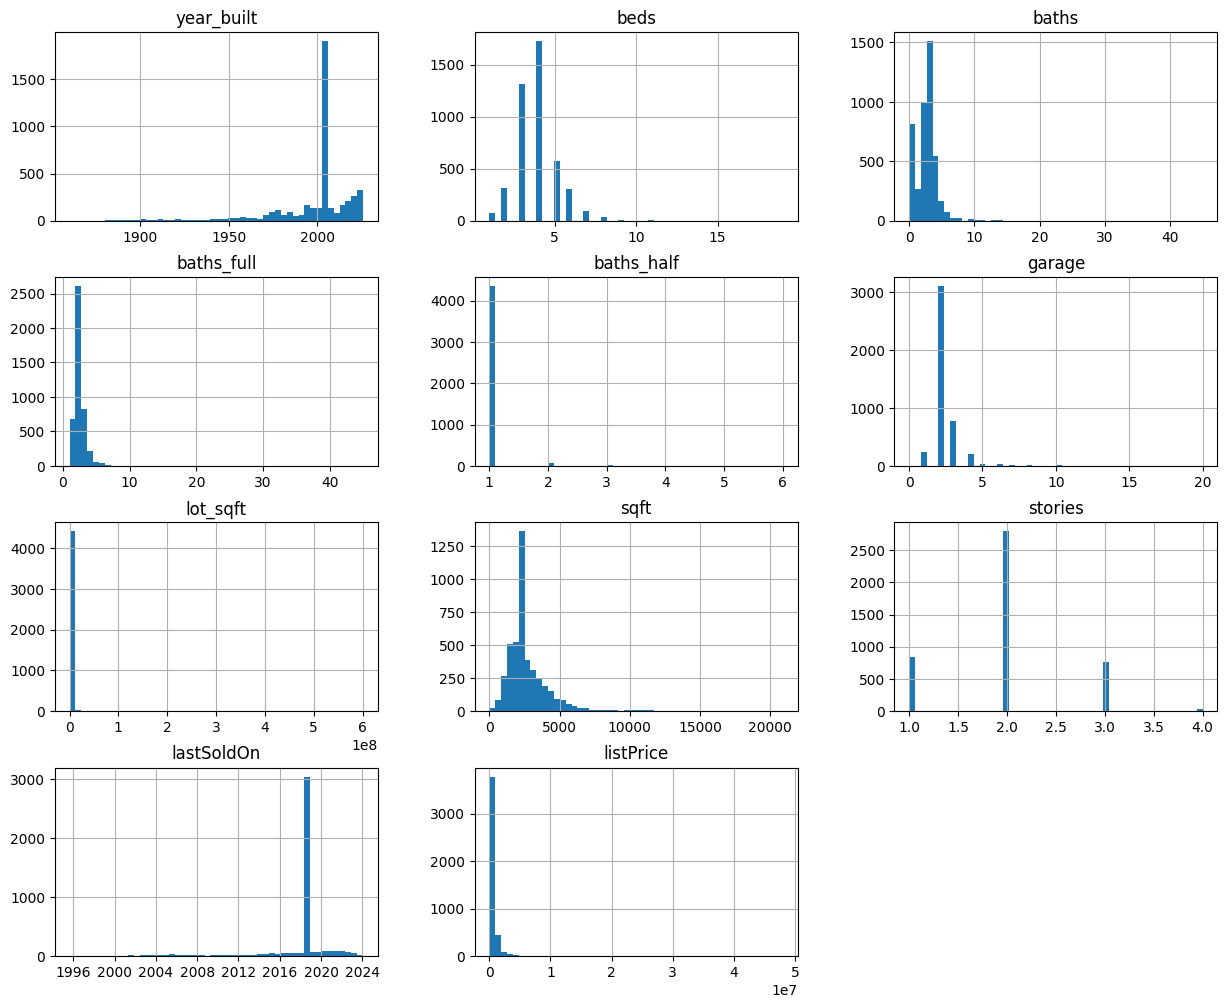

In [54]:
df.hist(bins=50, figsize=(15, 12))

## 4.3 Linear Regression Assumtions <a id=4.3></a>

<Figure size 600x600 with 0 Axes>

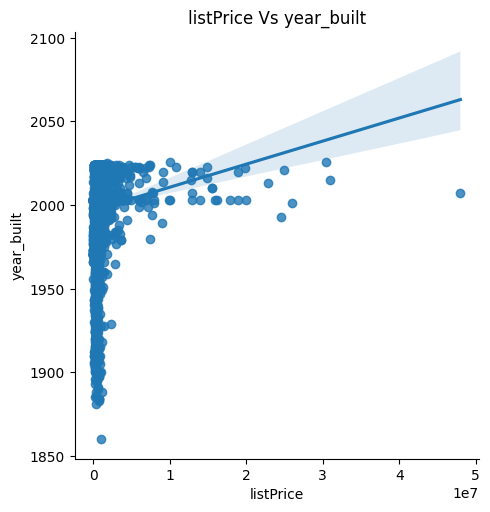

In [58]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='year_built', data=df)
plt.title("listPrice Vs year_built")
plt.show()

<Figure size 600x600 with 0 Axes>

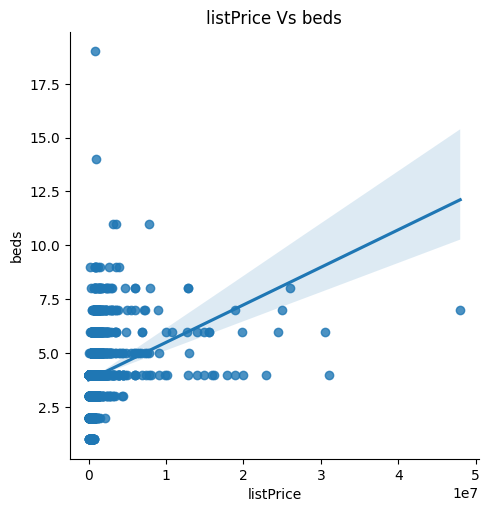

In [60]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='beds', data=df)
plt.title("listPrice Vs beds")
plt.show()

<Figure size 600x600 with 0 Axes>

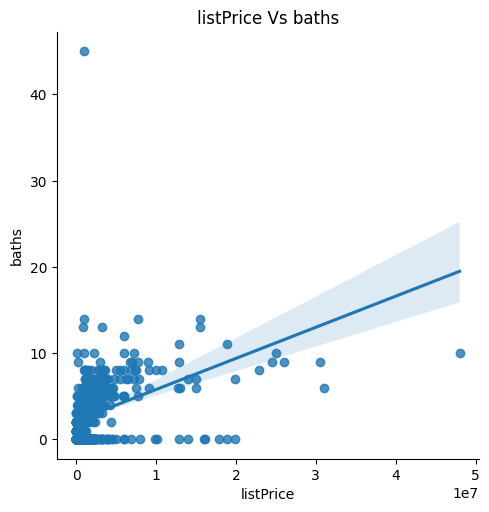

In [61]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='baths', data=df)
plt.title("listPrice Vs baths")
plt.show()

<Figure size 600x600 with 0 Axes>

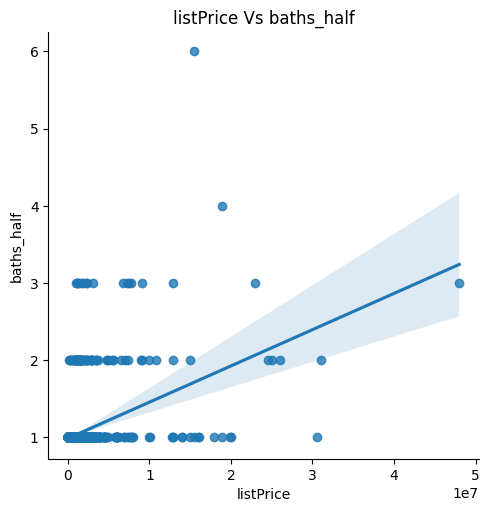

In [62]:
plt.figure(figsize=(6,6))
sns.lmplot(x='listPrice', y='baths_half', data=df)
plt.title("listPrice Vs baths_half")
plt.show()

In [ ]:
# Liear Regression Assumptopns
    # 1-Linearity
    # 2-Homoscedasticity
    # 3. Multivariate Normality
    # 4. Independence
    # 5. Multicollinearity
    # 6. Outlier
# Modelling


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        4440 non-null   object        
 1   year_built  4440 non-null   int32         
 2   beds        4440 non-null   float64       
 3   baths       4440 non-null   float64       
 4   baths_full  4440 non-null   float64       
 5   baths_half  4440 non-null   float64       
 6   garage      4440 non-null   float64       
 7   lot_sqft    4440 non-null   float64       
 8   sqft        4440 non-null   float64       
 9   stories     4440 non-null   float64       
 10  lastSoldOn  4440 non-null   datetime64[ns]
 11  listPrice   4440 non-null   float64       
 12  status      4440 non-null   object        
dtypes: datetime64[ns](1), float64(9), int32(1), object(2)
memory usage: 433.7+ KB
